In [2]:
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import random

from huggingface_hub import login
from datasets import load_dataset 

from pricer.items import Item
from pricer.parser import parse


In [3]:
load_dotenv(override=True)

True

In [4]:
hf_token = os.getenv("HF_TOKEN")
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [6]:
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Appliances", split="full")

In [7]:
print(f"Number of Appliances: {len(dataset):,}")

Number of Appliances: 94,327


In [10]:
dataset[1]

{'main_category': 'Tools & Home Improvement',
 'title': 'HANSGO Egg Holder for Refrigerator, Deviled Eggs Dispenser Egg Storage Stackable Plastic Egg Containers Hold ups to 10 Eggs',
 'average_rating': 4.2,
 'rating_number': 75,
 'features': ['Plastic',
  'Practical Kitchen Storage - Our egg holder holds up to 10 eggs in normal size, keep eggs safe and fresh with this home basics fridge bin.',
  'Easy to Use - Egg holder for refrigerator can be superimposed on the refrigerator, beautiful and room-saving, neatly organize your refrigerator without any loose eggs or flimsy egg cartons. Super easy to clean, you just need to use a sponge or rag to wipe water after washing.',
  'Premium Quality - Our transparent egg box is made of high-grade plastic, BPA free, nontoxic and odorless, safe and durable. Size: 10.6 x 4.9 x 2.7inches (L x W x H)',
  'Storage Organizer - Our egg trays are the perfect solution for fridge organizing, suited to contain the egg that is smaller than 6cm, compact design

In [12]:
max_price = 0
max_item = None

for datapoint in tqdm(dataset):
    try:
        price = float(datapoint["price"])
        if price > max_price:
            max_item = datapoint
            max_price = price
    except ValueError:
        pass

print(f"Highest cost item: {max_item['title']}.  The cost is: ${max_price:,.2f}")

  0%|          | 0/94327 [00:00<?, ?it/s]

Highest cost item: TurboChef BULLET Rapid Cook Electric Microwave Convection Oven.  The cost is: $21,095.62


In [13]:
items = [parse(datapoint, "Appliances") for datapoint in tqdm(dataset)]
items = [item for item in items if item is not None]
print(f"There are {len(items):,} items from {len(dataset):,} datapoints")

  0%|          | 0/94327 [00:00<?, ?it/s]

There are 35,307 items from 94,327 datapoints


In [14]:
items[0]

<WD12X10327 Rack Roller and stud assembly Kit (4 Pack) by AMI PARTS Replaces AP4980629 PS3486910 1811003 = $8.99>

In [15]:
print(items[5].full)

Dryer Drum Roller Kit Whirlpool Kenmore Amana   Support Part Replacement 110. 110.       
['💡 Drum Roller 349241t - An equivalent for parts , , 337089, , , , 340352, 3436, 349241, , 661562, 8170, 8205, , , , , K34-895, . Roller 349241t Kit is compatible with Whirlpool, Maytag, KitchenAid, Jenn-Air, Amana, Magic Chef, Admiral, Norge, Roper appliances. The Part 349241t is designed to support the drum and help it rotate smoothly during operation. Kit fits hundred of models and can be easily install.', "🔧 DIY eTips Included - Not sure how to replace the Dryer Drum Roller 349241t? Helpful information can be found on the page below. Scroll down to get more repair tips. Acquire valuable skills during the DIY repair project. Whirlpool Drum Roller 349241t will help if your appliance does not tumble, is noisy, doesn't start, there's no heat or not enough heat, or marks are left on clothes. To complete this repair, you will require a putty knife, a Phillips screwdriver, and a 5/16 nut driver.", '

In [16]:
prices = [item.price for item in items]
lengths = [len(item.full) for item in items]

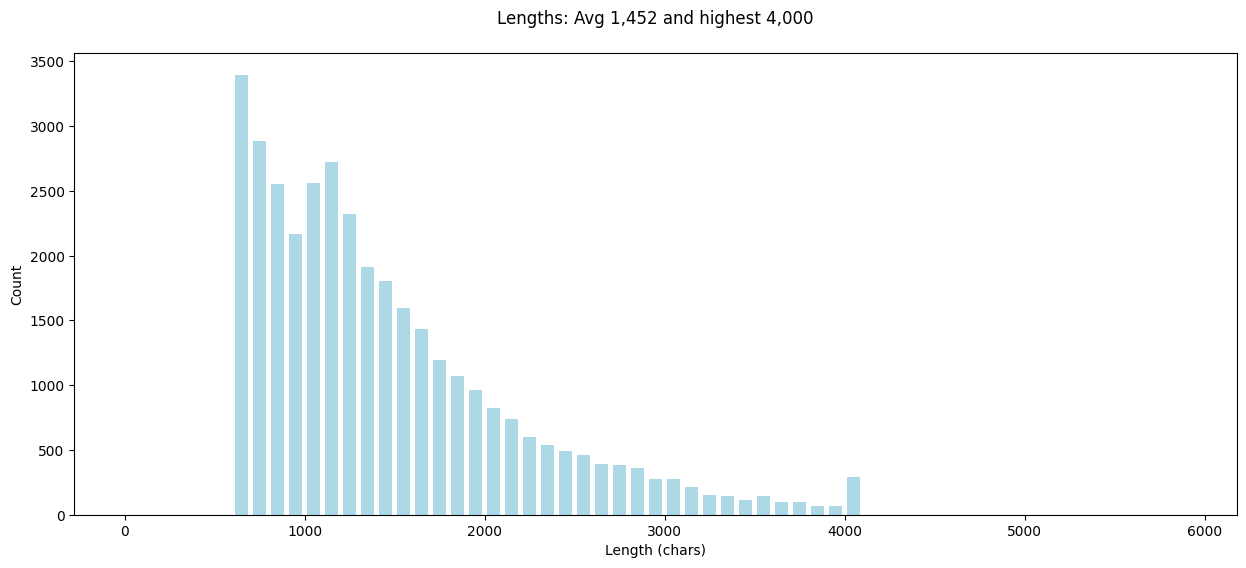

In [ ]:
# Distribution of lengths (chracters)
plt.figure(figsize=(15, 6))
plt.title(f"Lengths: Avg {sum(lengths)/len(lengths):,.0f} and highest {max(lengths):,}\n")
plt.xlabel('Length (chars)')
plt.ylabel('Count')
plt.hist(lengths, rwidth=0.7, color="lightblue", bins=range(0, 6000, 100))
plt.show()

In [19]:
max_length = max(lengths)
max_length_item = items[lengths.index(max_length)]
print(max_length_item.full)

Polyester Dryer Vent Filters Replacement Part by Beaquicy Replacement for Better vent Indoor Dryer Vent Packs of 12
['✅【 AIR 】--- The polyester filters provide optimal air conditioning for your dryer and keep it away from polluted air. Because these parts will rate to trap fine lint and dust particles, protect your home from unwanted bacteria and other unfriendly dust particles and can be vacuumed clean or replaced when fully loaded with lint. so that the air in your room is cleaner than ever. While protecting your indoor quality, clothes can dry faster. It helps improve the indoor air quality.', '✅【HIGH-GRADE 】--- The package includes 12 x replacement polyester filters for bettervent.They are well-made from durable and high-grade polyester which can traps fine lint and dust particles, optimize the cleaning process and prolong lifetime. Each filter protects up to 5 dryer loads! For best results insert blue side facing towards dryer vent.', '✅【WIDE 】--- These polyester filters are desig

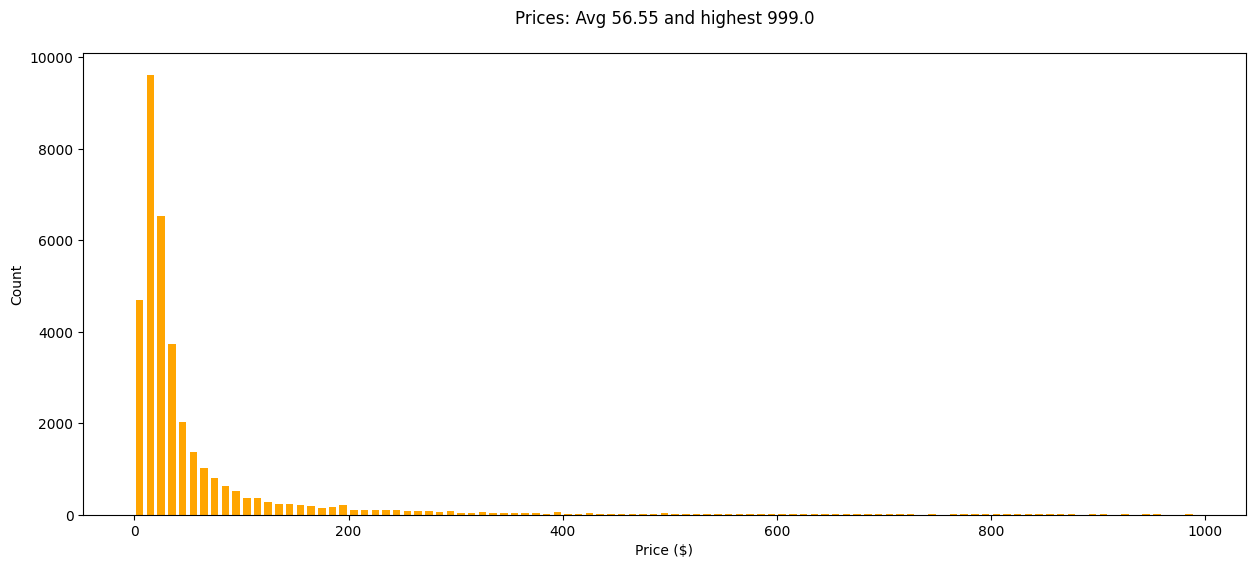

In [22]:
# Distribution of prices
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.2f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="orange", bins=range(0, 1000, 10))
plt.show()

In [23]:
print(items[3].full)

MLGB Stainless Steel Brushed Pattern Dishwasher Magnet Cover Panel Decal Home Appliance Art, Stainless Steel Fridge Door Cover Decals Magnetic, Black, Mobile Magnetic 23" x 26"
['Stainless Steel Brushed Pattern Magnetic Dishwasher Panel Covers allow you to easily transform your kitchen as the seasons change. You can instantly get rid of outdated and/or mismatched appliances, will give your kitchen a refreshing look.', ':', 'Vinyl + rubber magnet', 'Occasion:', 'Magnet Dishwasher Cover Decor dishwasher covers and any metal device surface with magnetism.', '【Kitchen Dishwasher Covers SIZE】S - 23 W x 17 H inches; 58.5 W x 43 H cm;L - 23 W x 26 H inches; 58.5 W x 66 H cm;', 'Attention:', 'Just ensure that your dishwasher is magnetic before ordering the dishwasher cover magnet', 'Due to the inconsistent calibration of the monitor, the colors on the computer monitor may be slightly different.', 'Quality service:', 'If you have any questions or questions, please feel free to contact us and we

In [25]:
from pricer.loaders import ItemLoader
loader = ItemLoader("Appliances")
items = loader.load()

Loading dataset Appliances


100%|██████████| 95/95 [00:03<00:00, 28.24it/s]


Completed Appliances with 35,307 datapoints in 0.1 mins


In [39]:

dataset_names = [
    "Automotive",
    "Electronics",
    "Office_Products",
    "Tools_and_Home_Improvement",
    "Cell_Phones_and_Accessories",
    "Toys_and_Games",
    "Appliances",
    "Musical_Instruments",
]

In [40]:
items = []
for dataset_name in dataset_names:
    loader = ItemLoader(dataset_name)
    items.extend(loader.load())

Loading dataset Automotive


100%|██████████| 2004/2004 [01:11<00:00, 27.88it/s]


Completed Automotive with 974,469 datapoints in 1.4 mins
Loading dataset Electronics


100%|██████████| 1611/1611 [01:41<00:00, 15.81it/s]


Completed Electronics with 464,024 datapoints in 1.8 mins
Loading dataset Office_Products


100%|██████████| 711/711 [00:17<00:00, 41.16it/s]


Completed Office_Products with 248,767 datapoints in 0.3 mins
Loading dataset Tools_and_Home_Improvement


100%|██████████| 1474/1474 [00:49<00:00, 29.89it/s]


Completed Tools_and_Home_Improvement with 552,147 datapoints in 0.9 mins
Loading dataset Cell_Phones_and_Accessories


100%|██████████| 1289/1289 [00:37<00:00, 34.15it/s]


Completed Cell_Phones_and_Accessories with 242,351 datapoints in 0.7 mins
Loading dataset Toys_and_Games


100%|██████████| 891/891 [00:21<00:00, 41.00it/s]


Completed Toys_and_Games with 347,657 datapoints in 0.4 mins
Loading dataset Appliances


100%|██████████| 95/95 [00:03<00:00, 25.40it/s]


Completed Appliances with 35,307 datapoints in 0.1 mins
Loading dataset Musical_Instruments


100%|██████████| 214/214 [00:05<00:00, 39.77it/s]


Completed Musical_Instruments with 68,855 datapoints in 0.1 mins


In [ ]:
from datasets import load_dataset

dataset = load_dataset(
    "McAuley-Lab/Amazon-Reviews-2023",
    "raw_meta_Electronics",
    split="full",
    trust_remote_code=True,
    download_mode="force_redownload"  # Forces fresh download
)

In [37]:
loader = ItemLoader("Electronics")
items = loader.load()
items.extend(loader.load())

Loading dataset Electronics


100%|██████████| 1611/1611 [02:24<00:00, 11.12it/s]


Completed Electronics with 464,024 datapoints in 2.5 mins
Loading dataset Electronics


100%|██████████| 1611/1611 [01:43<00:00, 15.54it/s]


Completed Electronics with 464,024 datapoints in 1.8 mins


In [35]:
electronics_ds = load_dataset(
    "McAuley-Lab/Amazon-Reviews-2023",
    "raw_meta_Electronics",
    split="full",
    trust_remote_code=True,
    download_mode="force_redownload"
)

Amazon-Reviews-2023.py: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


meta_Electronics.jsonl:   0%|          | 0.00/5.25G [00:00<?, ?B/s]

Generating full split:   0%|          | 0/1610012 [00:00<?, ? examples/s]

In [41]:
print(f"A grand total of {len(items):,} items")

A grand total of 2,933,577 items


In [44]:
items[1200]

<Divine Designs Pastel Rainbow Ombre Ocean Wave and Whale Tail Icon Vinyl Decal Sticker (4" Tall) = $6.99>

In [ ]:
# Remove duplicate items

random.seed(42)
random.shuffle(items)

seen = set()
items = [x for x in tqdm(items) if not (x.title in seen or seen.add(x.title))]

seen = set()
items = [x for x in tqdm(items) if not(x.full in seen or seen.add(x.full))]

del seen
print(f"Total items after deuplication: {len(items):,}")

  0%|          | 0/2933577 [00:00<?, ?it/s]

  0%|          | 0/2889429 [00:00<?, ?it/s]

Total items after deuplication: 2,887,890


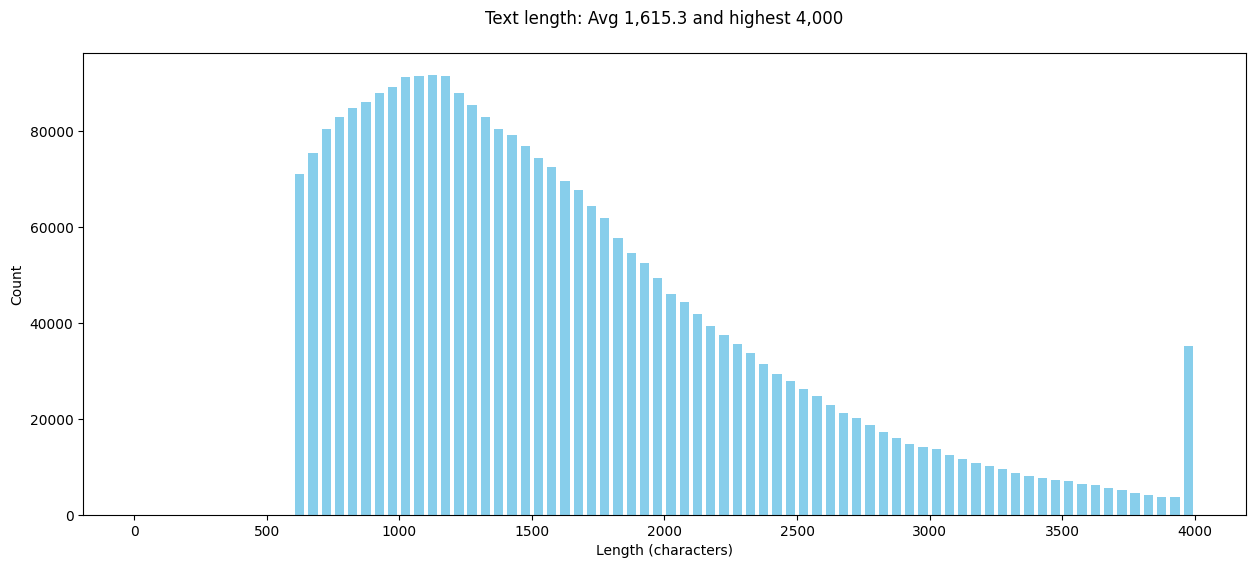

In [ ]:
# View of length distrubution for entire dataset (characters)
lengths = [len(item.full) for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Text length: Avg {sum(lengths)/len(lengths):,.1f} and highest {max(lengths):,}\n")
plt.xlabel("Length (characters)")
plt.ylabel("Count")
plt.hist(lengths, rwidth=0.7, color="skyblue", bins=range(0, 4050, 50))
plt.show()

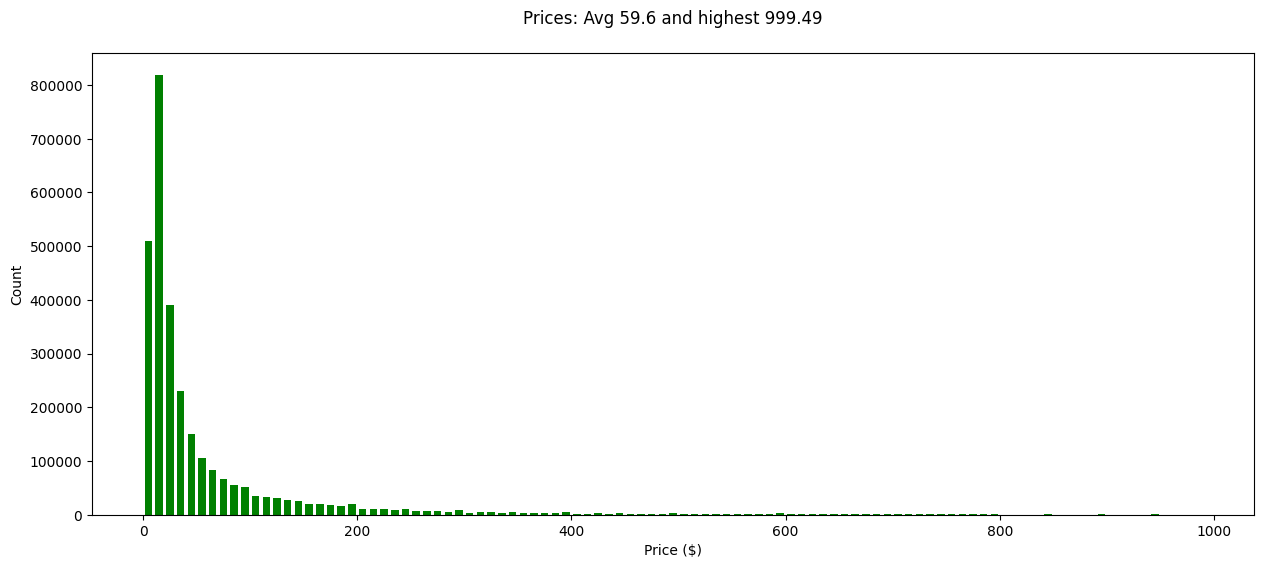

In [47]:
# Price distrubution for the entire dataset
prices = [item.price for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} and highest {max(prices):,}\n")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.hist(prices, rwidth=0.7, color="green", bins=range(0, 1000, 10))
plt.show()

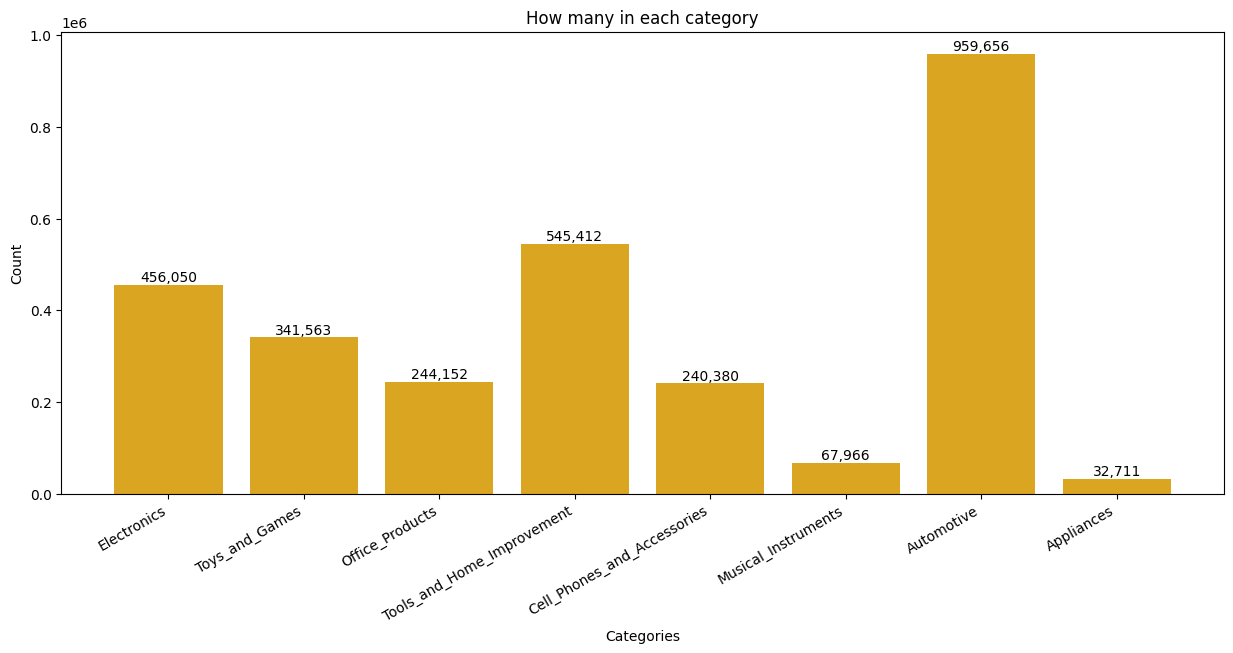

In [48]:
from collections import Counter
category_counts = Counter([item.category for item in items])

categories = category_counts.keys()
counts = [category_counts[category] for category in categories]

plt.figure(figsize=(15, 6))
plt.bar(categories, counts, color="goldenrod")
plt.title("How many in each category")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")

for i, v in enumerate(counts):
    plt.text(i, v, f"{v:,}", ha="center", va="bottom")

plt.show()

In [ ]:
# Subselect some data for baselining - weighted toward more expensive items and Tools, Automotive
np.random.seed(42)

SIZE = 820_000

prices = np.array([it.price for it in items], dtype=float)
categories = np.array([it.category for it in items])
p = (prices - prices.min()) / (prices.max() - prices.min() + 1e-9)

w = p**2
w[categories == "Tools_and_Home_Improvement"] *= 0.5
w[categories == "Automotive"] *= 0.05

w = w / w.sum()
idx = np.random.choice(len(items), size=SIZE, replace=False, p=w)
sample = [items[i] for i in idx]

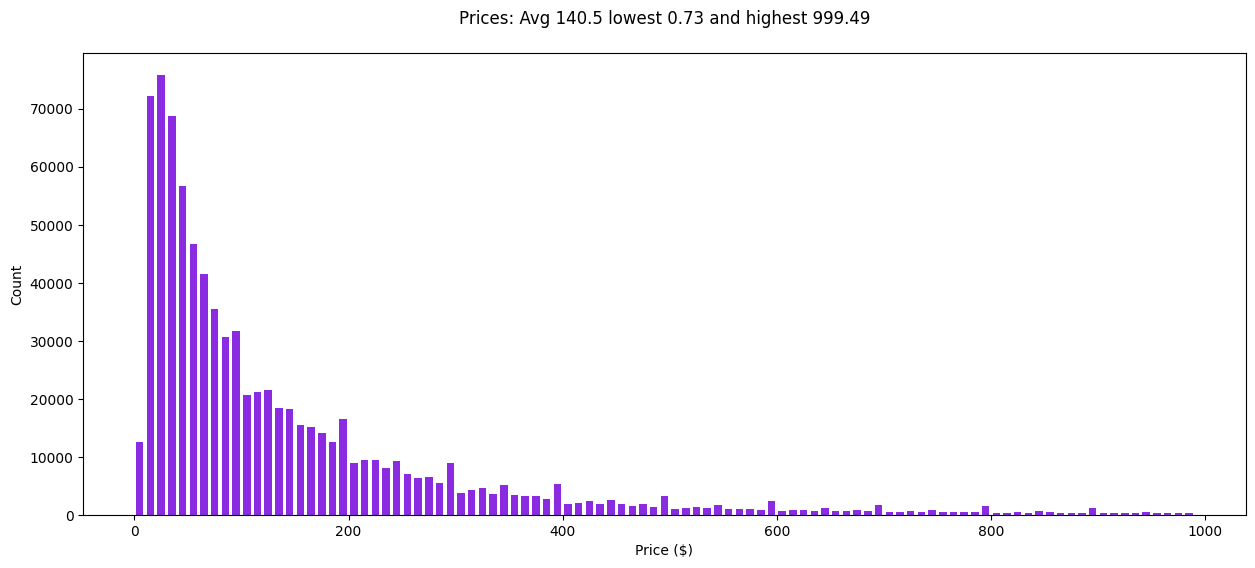

In [50]:
prices = [item.price for item in sample]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} lowest {min(prices):,} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="blueviolet", bins=range(0, 1000, 10))
plt.show()

In [51]:
# Shuffle again for the final dataset
random.seed(42)
random.shuffle(sample)

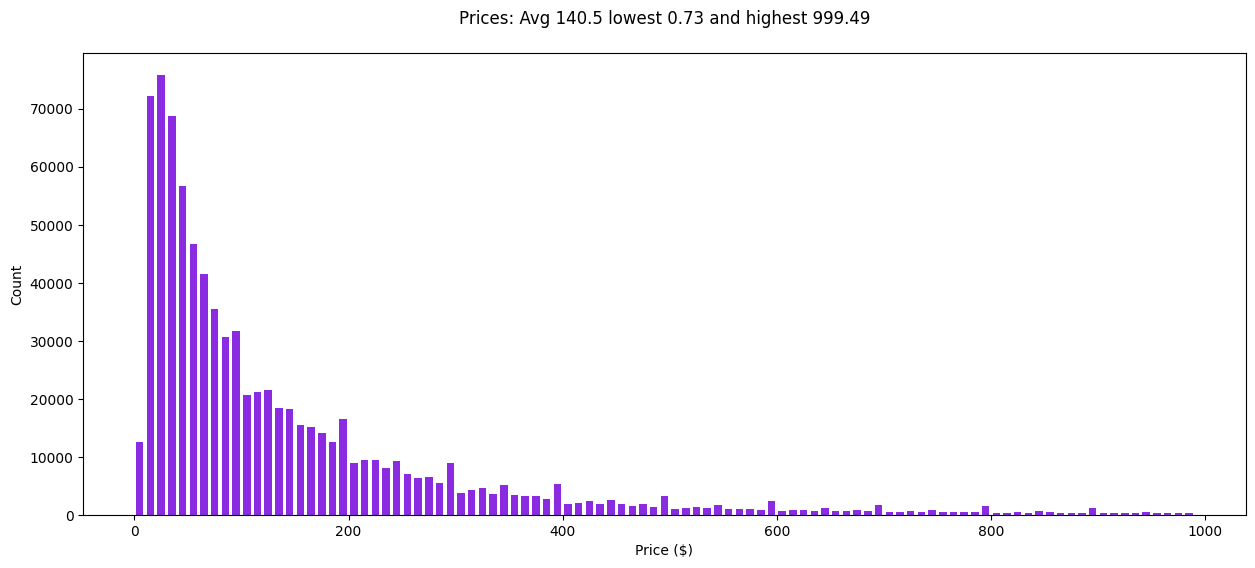

In [52]:
prices = [item.price for item in sample]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} lowest {min(prices):,} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="blueviolet", bins=range(0, 1000, 10))
plt.show()

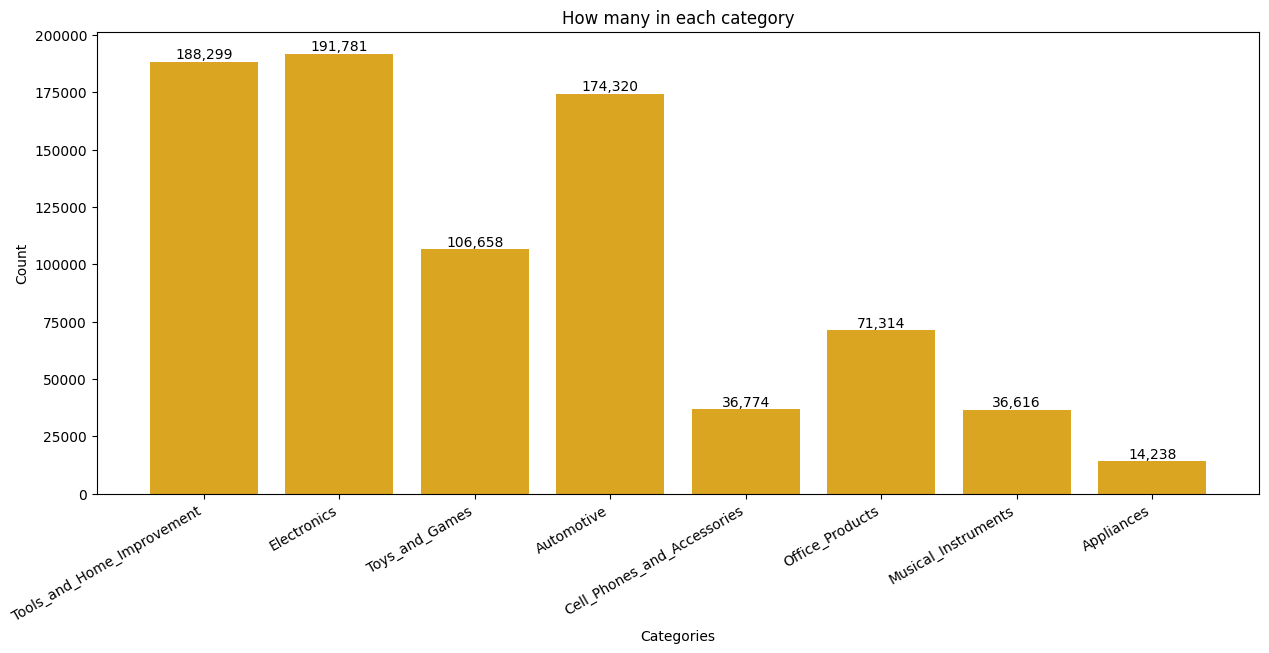

In [53]:
from collections import Counter
category_counts = Counter([item.category for item in sample])

categories = category_counts.keys()
counts = [category_counts[category] for category in categories]

# Bar chart by category
plt.figure(figsize=(15, 6))
plt.bar(categories, counts, color="goldenrod")
plt.title('How many in each category')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.xticks(rotation=30, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(counts):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

# Display the chart
plt.show()

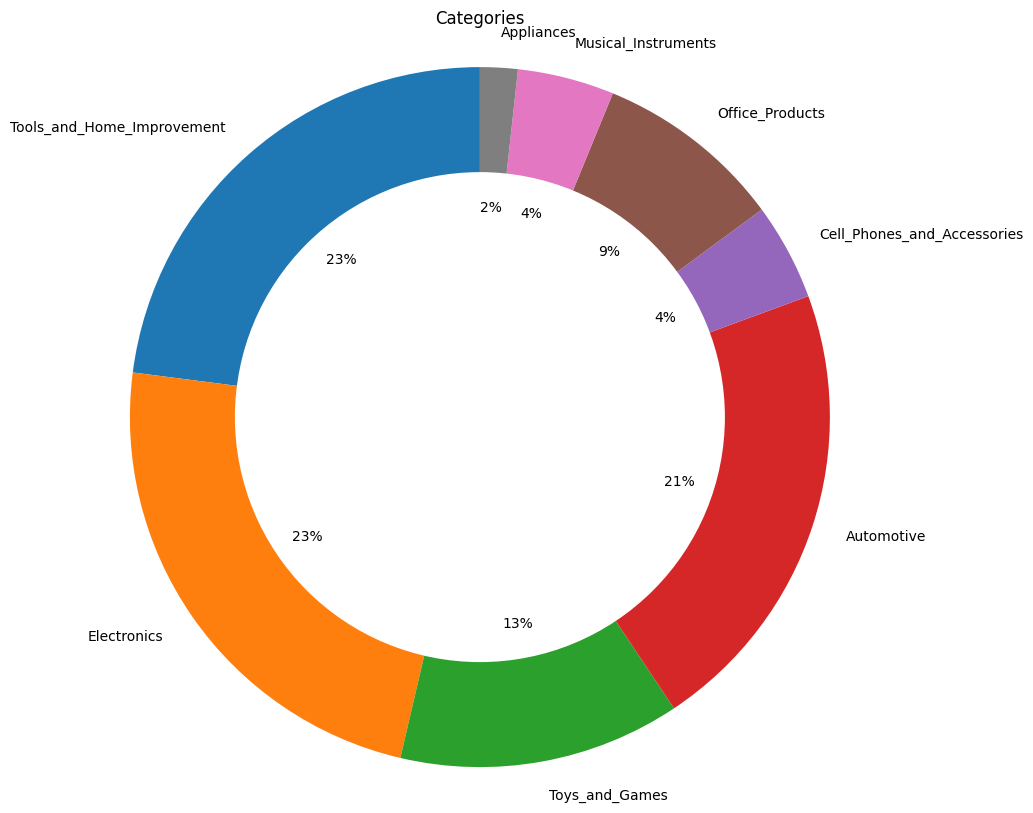

In [54]:
# Automotive still in the lead, but improved somewhat
# For another perspective, let's look at a pie

plt.figure(figsize=(12, 10))
plt.pie(counts, labels=categories, autopct='%1.0f%%', startangle=90)

# Add a circle at the center to create a donut chart (optional)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Categories')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

plt.show()

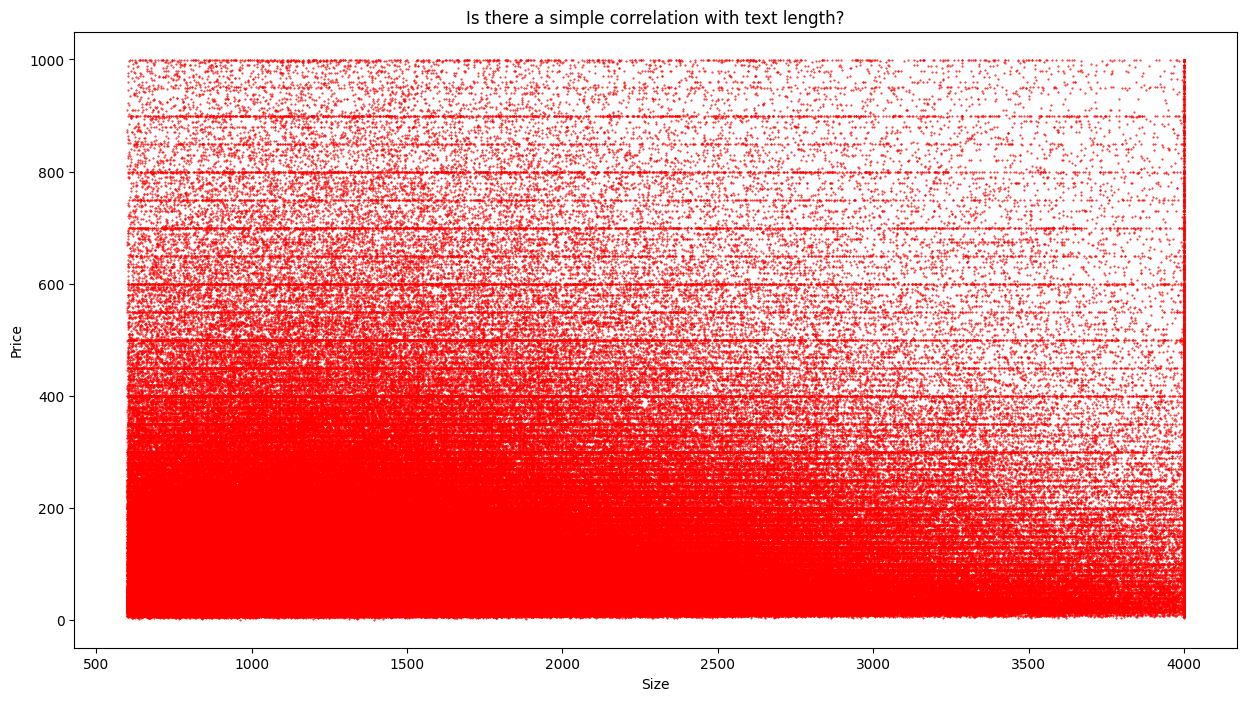

In [55]:
# How does the price vary with the character count?

sizes = [len(item.full) for item in sample]
prices = [item.price for item in sample]

# Create the scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(sizes, prices, s=0.2, color="red")

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Is there a simple correlation with text length?')

# Display the plot
plt.show()

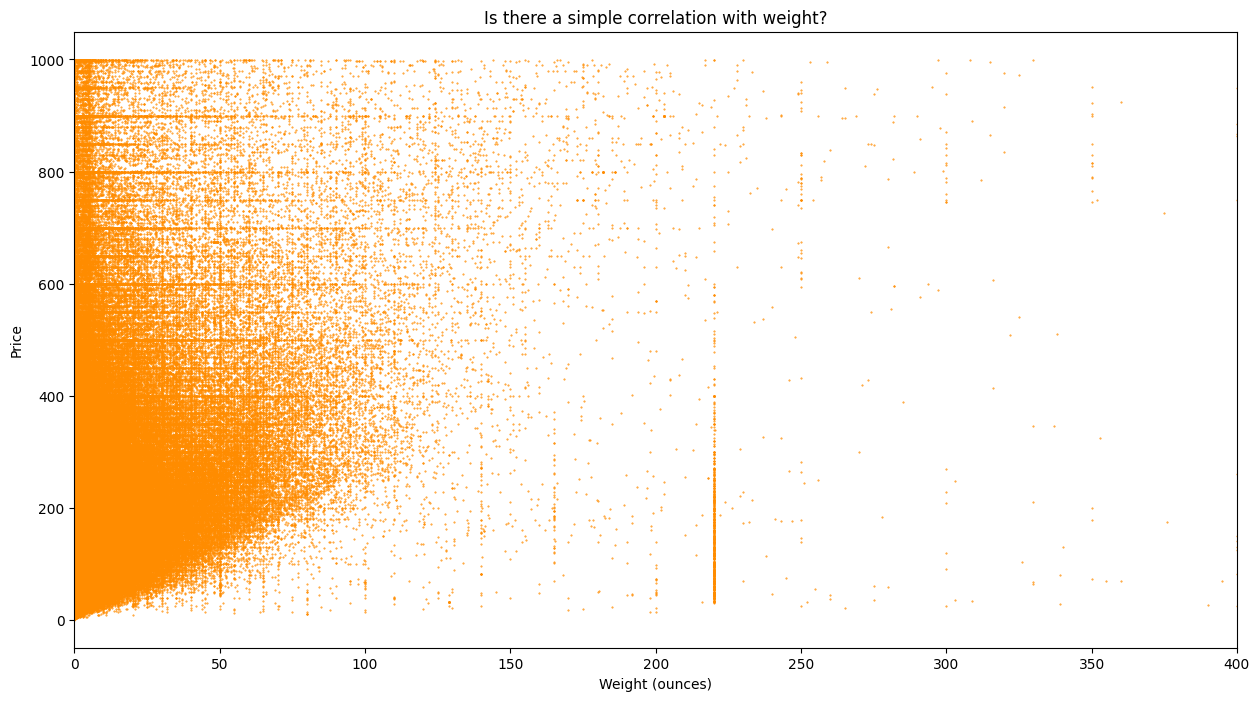

In [56]:
# How does the price vary with the weight?

ounces = [item.weight for item in sample]
prices = [item.price for item in sample]

# Create the scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(ounces, prices, s=0.2, color="darkorange")

# Add labels and title
plt.xlabel('Weight (ounces)')
plt.ylabel('Price')
plt.xlim(0, 400)
plt.title('Is there a simple correlation with weight?')

# Display the plot
plt.show()

In [57]:
username = "emsikes"
full = f"{username}/items_raw_full"
lite = f"{username}/items_raw_lite"

train = sample[:800_000]
val = sample[800_000:810_000]
test = sample[810_000:]

Item.push_to_hub(full, train, val, test)

train_lite = train[:20_000]
val_lite = val[:1_000]
test_lite = test[:1_000]

Item.push_to_hub(lite, train_lite, val_lite, test_lite)

Uploading the dataset shards:   0%|          | 0/3 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/267 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/267 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/267 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]